<font color='mediumblue'> **Projet : Consommation et production électrique en France** </font>

**Objectifs**

1. Manipulation de données avec pandas
    - Création des dataframes à partir des fichiers RTE
        - Dossier data_rte : données issues du site RTE (2012>2020) => données sur lesquelles ce notebook s'appuie
    - Exploration des données contenues dans ces dataframes   
    
2. Etude des relations entre variables



**Conseils généraux:**
- Afficher les premières lignes de la variable que vous êtes en train d'étudier peut vous aider à comprendre bien des problèmes (méthode **head** de pandas)
- De même la méthode **describe** de pandas est très précieuse pour repérer la présence de NaN, d'outliers, repérer les types de chaque variable etc. 
- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données
- C'est une analyse exploratoire : **tatonnez**, **faites des graphiques**, ... 
- N'hésitez pas à **consulter l'aide de Pandas** ou à chercher la réponse à vos questions sur internet (quasiment tous les bugs que vous observerez on déjà fait l'objet d'un post sur **stackoverflow**)

# Exploration des données

L'exploration des données présente différents intérêts :
- On comprend mieux nos données
- On voit déjà des premières tendances
- Elle nous donne des pistes à explorer pour la suite
- ...

Notre objectif : explorer au maximum les données pour en tirer de l'information

**L'importance de l'exploration des données**

La première étape de chargement, exploration et nettoyage de données peut être chronophage lorsqu'on traite des sets de données "réels"...  <br/> 
Cela fait partie du travail de data scientist, il faut s'y faire :-)

----------------------------------------
<font color=#66b3ff> 
    
<small> <i> 

It takes less than five lines of code to train a basic machine learning algorithm. Exploratory data analysis and data preparation in comparison take longer and comprise of 80% of the data scientist’s time.  <br/> 
https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87

----------------------------------------   
    
When I started learning machine learning and data science, much of it (all of it) was through online courses. I used them to create my own AI Masters Degree. All of them provided excellent curriculum along with excellent datasets. <br/> 
The datasets were excellent because they were ready to be used with machine learning algorithms right out of the box. <br/> 
You’d download the data, choose your algorithm, call the .fit() function, pass it the data and all of a sudden the loss value would start going down and you’d be left with an accuracy metric. Magic. <br/> 
This was how the majority of my learning went. Then I got a job as a machine learning engineer. I thought, finally, I can apply what I’ve been learning to real-world problems. <br/> 
Roadblock. <br/> 
The client sent us the data. I looked at it. WTF was this? <br/> 
Words, time stamps, more words, rows with missing data, columns, lots of columns. Where were the numbers? <br/> 
‘How do I deal with this data?’ I asked Athon. <br/> 
‘You’ll have to do some feature engineering and encode the categorical variables,’ he said, ‘I’ll Slack you a link.’ <br/> 
I went to my digital mentor. Google. ‘What is feature engineering?’ <br/> 
Google again. ‘What are categorical variables?’ <br/> 
Athon sent the link. I opened it. <br/> 
There it was. The next bridge I had to cross. Exploratory Data Analysis. <br/> 
You do exploratory data analysis to learn more about the data before you ever run a machine learning model. <br/> 
You create your own mental model of the data so when you run a machine learning model to make predictions, you’ll be able to recognise whether they’re BS or not.  <br/>
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

</i> </small> </font> 

<font color='mediumblue'> **An EDA checklist**</font> 

1. Quelle(s) question(s) essayez-vous de résoudre/de prouver que vous avez tort ?
2. De quel type de données disposez-vous et comment traitez-vous les différents types ?
3. Qu'est-ce qui manque dans les données et comment y faire face ?
4. Où sont les valeurs aberrantes et pourquoi devriez-vous vous en soucier ?
5. Comment pouvez-vous ajouter, modifier ou supprimer des fonctionnalités pour tirer le meilleur parti de vos données ?
        
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

In [28]:
import pandas as pd
from os import listdir
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 8

In [29]:
!pip install unidecode
!pip install seaborn
import os
import zipfile
import pandas as pd
import numpy as np
from unidecode import unidecode
import io
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [30]:
folder_path = 'data_rte'

In [31]:
# let's see what's inside the data folder: names of the zip files inside the folder
list_of_filenames = os.listdir(folder_path)
list_of_filenames

['eCO2mix_RTE_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_PACA_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Bretagne_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Grand-Est_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Grand-Est_Annuel-Definitif_2016.zip',
 'eCO2mix

In [32]:
list_of_filenames[0] # let's try to open the first file of the folder, just to see what's inside

'eCO2mix_RTE_Annuel-Definitif_2017.zip'

In [33]:
# the complete data path includes the data folder
file_name = os.path.join(folder_path, list_of_filenames[0])
file_name

'data_rte/eCO2mix_RTE_Annuel-Definitif_2017.zip'

In [34]:
# let's try to open the dataframe
test_df = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=False)
test_df

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,France,Données définitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,0.0,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
1,France,Données définitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,8.0,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0
3,France,Données définitives,2017-01-01,00:45,NaN,74150.0,74250.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,8.0,2375.0,4149.0,61.0,2661.0,2522.0,385.0,556.0,283.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,France,Données définitives,2017-12-31,23:00,60642.0,57300.0,57100.0,164.0,37.0,2450.0,...,0.0,2152.0,226.0,73.0,6003.0,1906.0,444.0,591.0,291.0,279.0
35037,France,Données définitives,2017-12-31,23:15,NaN,57300.0,57150.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,France,Données définitives,2017-12-31,23:30,60479.0,57300.0,57200.0,165.0,37.0,2464.0,...,0.0,2160.0,225.0,80.0,5968.0,1401.0,343.0,597.0,289.0,278.0
35039,France,Données définitives,2017-12-31,23:45,NaN,57050.0,57000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
test_df.drop([len(test_df) - 1], inplace=True)

In [36]:
test_df

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,France,Données définitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,0.0,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
1,France,Données définitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,8.0,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0
3,France,Données définitives,2017-01-01,00:45,NaN,74150.0,74250.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,8.0,2375.0,4149.0,61.0,2661.0,2522.0,385.0,556.0,283.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,France,Données définitives,2017-12-31,22:45,NaN,56000.0,55800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,France,Données définitives,2017-12-31,23:00,60642.0,57300.0,57100.0,164.0,37.0,2450.0,...,0.0,2152.0,226.0,73.0,6003.0,1906.0,444.0,591.0,291.0,279.0
35037,France,Données définitives,2017-12-31,23:15,NaN,57300.0,57150.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,France,Données définitives,2017-12-31,23:30,60479.0,57300.0,57200.0,165.0,37.0,2464.0,...,0.0,2160.0,225.0,80.0,5968.0,1401.0,343.0,597.0,289.0,278.0


In [37]:
list_of_national_filenames = []
for filename in list_of_filenames:
    if "eCO2mix_RTE_Annuel-Definitif_" in filename:
        list_of_national_filenames.append(filename)
list_of_national_filenames

['eCO2mix_RTE_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Annuel-Definitif_2012.zip',
 'eCO2mix_RTE_Annuel-Definitif_2016.zip',
 'eCO2mix_RTE_Annuel-Definitif_2013.zip']

In [38]:
list_of_regionalism_filenames = []
for filename in list_of_filenames:
    if "eCO2mix_RTE_Annuel-Definitif_" in filename:
        pass
    else :
        list_of_regionalism_filenames.append(filename)
list_of_regionalism_filenames

['eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_PACA_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Bretagne_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2013.zip',
 'eCO2mix_RTE_Grand-Est_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Occitanie_Annuel-Definitif_2018.zip',
 'eCO2mix_RTE_Normandie_Annuel-Definitif_2017.zip',
 'eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2014.zip',
 'eCO2mix_RTE_Grand-Est_Annuel-Definitif_2016.zip',
 'eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2016.zip',
 'eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2015.zip',
 'eCO2mix_RTE_P

In [39]:
list_regionalism_dfs = [] # list of dfs
for filename in list_of_regionalism_filenames:
    full_path_to_file = os.path.join(folder_path, filename)
    df = pd.read_csv(full_path_to_file, encoding='ISO-8859-1', sep='\t', index_col=False) # create a df
    df.drop([len(df) - 1], inplace=True) # remove the last line of the df
    list_regionalism_dfs.append(df) # save the df in the list

In [40]:
list_national_dfs = [] # list of dfs
for filename in list_of_national_filenames:
    full_path_to_file = os.path.join(folder_path, filename)
    df = pd.read_csv(full_path_to_file, encoding='ISO-8859-1', sep='\t', index_col=False) # create a df
    df.drop([len(df) - 1], inplace=True) # remove the last line of the df
    list_national_dfs.append(df) # save the df in the list

/tmp/ipykernel_9397/804837273.py:4: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_path_to_file, encoding='ISO-8859-1', sep='\t', index_col=False) # create a df
/tmp/ipykernel_9397/804837273.py:4: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_path_to_file, encoding='ISO-8859-1', sep='\t', index_col=False) # create a df
/tmp/ipykernel_9397/804837273.py:4: DtypeWarning: Columns (18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_path_to_file, encoding='ISO-8859-1', sep='\t', index_col=False) # create a df
/tmp/ipykernel_9397/804837273.py:4: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_path_to_file, encoding='ISO-8859-1'

In [41]:
list_regionalism_dfs[4] # check that each element of the created list is a dataframe

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
0,Normandie,Données définitives,2013-01-01,00:00,ND,ND,ND,ND,ND,ND,ND,ND,ND,NaN
1,Normandie,Données définitives,2013-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Normandie,Données définitives,2013-01-01,00:30,3683,432,8200,216,0,12,-,54,-5233,NaN
3,Normandie,Données définitives,2013-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Normandie,Données définitives,2013-01-01,01:00,3549,433,8224,190,0,12,-,54,-5366,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,Normandie,Données définitives,2013-12-31,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,Normandie,Données définitives,2013-12-31,23:00,3952,373,10093,271,0,18,-,45,-6850,NaN
35037,Normandie,Données définitives,2013-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,Normandie,Données définitives,2013-12-31,23:30,3791,373,9815,269,0,15,-,45,-6729,NaN


In [42]:
list_national_dfs[4] # check that each element of the created list is a dataframe

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,France,Données définitives,2012-01-01,00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
1,France,Données définitives,2012-01-01,00:15,NaN,57700.0,57550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2012-01-01,00:30,58315.0,57200.0,56900.0,492.0,25.0,3816.0,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
3,France,Données définitives,2012-01-01,00:45,NaN,56200.0,56000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2012-01-01,01:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,France,Données définitives,2012-12-31,22:45,NaN,59250.0,59450.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35132,France,Données définitives,2012-12-31,23:00,60985.0,60600.0,60800.0,480.0,0.0,3543.0,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
35133,France,Données définitives,2012-12-31,23:15,NaN,60550.0,60750.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35134,France,Données définitives,2012-12-31,23:30,60747.0,60500.0,60700.0,479.0,0.0,3536.0,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND


In [43]:
raw_regionalism_df = pd.concat(list_regionalism_dfs) # we add up all the dfs into one big one
raw_regionalism_df

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
0,Pays-de-la-Loire,Données définitives,2014-01-01,00:00,3956.0,137.0,-,255.0,0.0,2.0,-,39.0,3521.0,NaN
1,Pays-de-la-Loire,Données définitives,2014-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pays-de-la-Loire,Données définitives,2014-01-01,00:30,3833.0,138.0,-,271.0,0.0,2.0,-,46.0,3375.0,NaN
3,Pays-de-la-Loire,Données définitives,2014-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pays-de-la-Loire,Données définitives,2014-01-01,01:00,3661.0,138.0,-,285.0,0.0,2.0,-,46.0,3189.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:00,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0,NaN
35037,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:30,9255.0,246.0,11569.0,155.0,0.0,2136.0,-1203.0,147.0,-3794.0,NaN


In [44]:
raw_national_df = pd.concat(list_national_dfs) # we add up all the dfs into one big one
raw_national_df

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,France,Données définitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,0.0,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
1,France,Données définitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,8.0,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0
3,France,Données définitives,2017-01-01,00:45,NaN,74150.0,74250.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,8.0,2375.0,4149.0,61.0,2661.0,2522.0,385.0,556.0,283.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,France,Données définitives,2013-12-31,22:45,NaN,62850.0,62450.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,France,Données définitives,2013-12-31,23:00,64252.0,64000.0,63600.0,455.0,0.0,2293.0,...,0.0,1803.0,419.0,72.0,5615.0,1880.0,636.0,462.0,167.0,180.0
35037,France,Données définitives,2013-12-31,23:15,NaN,64000.0,63550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,France,Données définitives,2013-12-31,23:30,64090.0,64000.0,63500.0,454.0,0.0,2306.0,...,0.0,1808.0,427.0,72.0,5682.0,1870.0,425.0,456.0,166.0,179.0


In [100]:
secend_test_df = raw_regionalism_df.copy() # create a copy of the original df
secend_test_df["date and time"] = pd.to_datetime(secend_test_df['Date'] + ' ' + secend_test_df['Heures']) # create a column named "date and time" and put it the date and time
secend_test_df

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13,date and time
0,Pays-de-la-Loire,Données définitives,2014-01-01,00:00,3956.0,137.0,-,255.0,0.0,2.0,-,39.0,3521.0,NaN,2014-01-01 00:00:00
1,Pays-de-la-Loire,Données définitives,2014-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:15:00
2,Pays-de-la-Loire,Données définitives,2014-01-01,00:30,3833.0,138.0,-,271.0,0.0,2.0,-,46.0,3375.0,NaN,2014-01-01 00:30:00
3,Pays-de-la-Loire,Données définitives,2014-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:45:00
4,Pays-de-la-Loire,Données définitives,2014-01-01,01:00,3661.0,138.0,-,285.0,0.0,2.0,-,46.0,3189.0,NaN,2014-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31 22:45:00
35036,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:00,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0,NaN,2018-12-31 23:00:00
35037,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31 23:15:00
35038,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:30,9255.0,246.0,11569.0,155.0,0.0,2136.0,-1203.0,147.0,-3794.0,NaN,2018-12-31 23:30:00


In [89]:
test_df = raw_national_df.copy() # create a copy of the original df
test_df["date and time"] = pd.to_datetime(test_df['Date'] + ' ' + test_df['Heures']) # create a column named "date and time" and put it the date and time
test_df

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,date and time
0,France,Données définitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0,2017-01-01 00:00:00
1,France,Données définitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:15:00
2,France,Données définitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0,2017-01-01 00:30:00
3,France,Données définitives,2017-01-01,00:45,NaN,74150.0,74250.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:45:00
4,France,Données définitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,2375.0,4149.0,61.0,2661.0,2522.0,385.0,556.0,283.0,252.0,2017-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,France,Données définitives,2013-12-31,22:45,NaN,62850.0,62450.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-31 22:45:00
35036,France,Données définitives,2013-12-31,23:00,64252.0,64000.0,63600.0,455.0,0.0,2293.0,...,1803.0,419.0,72.0,5615.0,1880.0,636.0,462.0,167.0,180.0,2013-12-31 23:00:00
35037,France,Données définitives,2013-12-31,23:15,NaN,64000.0,63550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-31 23:15:00
35038,France,Données définitives,2013-12-31,23:30,64090.0,64000.0,63500.0,454.0,0.0,2306.0,...,1808.0,427.0,72.0,5682.0,1870.0,425.0,456.0,166.0,179.0,2013-12-31 23:30:00


In [101]:
secend_test_df.set_index(['date and time', 'Périmètre'], inplace=True)

In [102]:
secend_test_df.replace('ND', np.nan, inplace=True)
secend_test_df.replace('-', np.nan, inplace=True)
secend_test_df = secend_test_df.apply(pd.to_numeric, errors = "ignore")

In [103]:
secend_test_df

,,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
date and time,Périmètre,,,,,,,,,,,,,
2014-01-01 00:00:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:00,3956.0,137.0,NaN,255.0,0.0,2.0,NaN,39.0,3521.0,NaN
2014-01-01 00:15:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:30,3833.0,138.0,NaN,271.0,0.0,2.0,NaN,46.0,3375.0,NaN
2014-01-01 00:45:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,Pays-de-la-Loire,Données définitives,2014-01-01,01:00,3661.0,138.0,NaN,285.0,0.0,2.0,NaN,46.0,3189.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:00:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:00,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0,NaN
2018-12-31 23:15:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# secend_test_df.set_index('date and time', inplace=True)

In [94]:
secend_test_df

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Unnamed: 13
date and time,,,,,,,,,,,,,,
2014-01-01 00:00:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:00,3956.0,137.0,NaN,255.0,0.0,2.0,NaN,39.0,3521.0,NaN
2014-01-01 00:15:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:30,3833.0,138.0,NaN,271.0,0.0,2.0,NaN,46.0,3375.0,NaN
2014-01-01 00:45:00,Pays-de-la-Loire,Données définitives,2014-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,Pays-de-la-Loire,Données définitives,2014-01-01,01:00,3661.0,138.0,NaN,285.0,0.0,2.0,NaN,46.0,3189.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,22:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:00:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:00,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0,NaN
2018-12-31 23:15:00,Auvergne-Rhône-Alpes,Données définitives,2018-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
secend_test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2524032 entries, 2014-01-01 00:00:00 to 2018-12-31 23:45:00
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Périmètre       object 
 1   Nature          object 
 2   Date            object 
 3   Heures          object 
 4   Consommation    float64
 5   Thermique       float64
 6   Nucléaire       float64
 7   Eolien          float64
 8   Solaire         float64
 9   Hydraulique     float64
 10  Pompage         float64
 11  Bioénergies     float64
 12  Ech. physiques  float64
 13  Unnamed: 13     float64
dtypes: float64(10), object(4)
memory usage: 288.9+ MB


In [96]:
test_df.set_index('date and time', inplace=True)

In [97]:
test_df

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
date and time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,France,Données définitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,0.0,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
2017-01-01 00:15:00,France,Données définitives,2017-01-01,00:15,NaN,75500.0,75800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,France,Données définitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,8.0,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0
2017-01-01 00:45:00,France,Données définitives,2017-01-01,00:45,NaN,74150.0,74250.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,France,Données définitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,8.0,2375.0,4149.0,61.0,2661.0,2522.0,385.0,556.0,283.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 22:45:00,France,Données définitives,2013-12-31,22:45,NaN,62850.0,62450.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-31 23:00:00,France,Données définitives,2013-12-31,23:00,64252.0,64000.0,63600.0,455.0,0.0,2293.0,...,0.0,1803.0,419.0,72.0,5615.0,1880.0,636.0,462.0,167.0,180.0
2013-12-31 23:15:00,France,Données définitives,2013-12-31,23:15,NaN,64000.0,63550.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
secend_test_df.sort_index(inplace=True) # sort the dates chronologically

In [73]:
test_df.sort_index(inplace=True) # sort the dates chronologically

In [104]:
secend_test_df.drop(["Nature", "Date", "Heures", "Unnamed: 13"], inplace=True, axis=1)
# axis=1 means that i want to drop columns, and not lines

In [58]:
test_df.drop(['Périmètre', "Nature", "Date", "Heures"], inplace=True, axis=1)
# axis=1 means that i want to drop columns, and not lines

In [105]:
secend_test_df

,,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
date and time,Périmètre,,,,,,,,,
2014-01-01 00:00:00,Pays-de-la-Loire,3956.0,137.0,NaN,255.0,0.0,2.0,NaN,39.0,3521.0
2014-01-01 00:15:00,Pays-de-la-Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,Pays-de-la-Loire,3833.0,138.0,NaN,271.0,0.0,2.0,NaN,46.0,3375.0
2014-01-01 00:45:00,Pays-de-la-Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,Pays-de-la-Loire,3661.0,138.0,NaN,285.0,0.0,2.0,NaN,46.0,3189.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:00:00,Auvergne-Rhône-Alpes,9022.0,246.0,11611.0,167.0,0.0,2412.0,-1142.0,149.0,-4419.0
2018-12-31 23:15:00,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
test_df

,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
date and time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
2012-01-01 00:15:00,NaN,57700.0,57550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:30:00,58315.0,57200.0,56900.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
2012-01-01 00:45:00,NaN,56200.0,56000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,NaN,62050.0,62550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:00:00,63977.0,63500.0,64000.0,146.0,11.0,3910.0,55589.0,1537.0,0.0,5148.0,...,4.0,2494.0,1296.0,116.0,3716.0,1432.0,0.0,557.0,318.0,296.0
2018-12-31 23:15:00,NaN,63750.0,64300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
secend_test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2524032 entries, 2013-01-01 00:00:00 to 2018-12-31 23:45:00
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Périmètre       object 
 1   Consommation    float64
 2   Thermique       float64
 3   Nucléaire       float64
 4   Eolien          float64
 5   Solaire         float64
 6   Hydraulique     float64
 7   Pompage         float64
 8   Bioénergies     float64
 9   Ech. physiques  float64
dtypes: float64(9), object(1)
memory usage: 211.8+ MB


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245472 entries, 2012-01-01 00:00:00 to 2018-12-31 23:45:00
Data columns (total 32 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Consommation                          122736 non-null  float64
 1   Prévision J-1                         245472 non-null  float64
 2   Prévision J                           245472 non-null  float64
 3   Fioul                                 122736 non-null  float64
 4   Charbon                               122736 non-null  float64
 5   Gaz                                   122736 non-null  float64
 6   Nucléaire                             122736 non-null  float64
 7   Eolien                                122736 non-null  float64
 8   Solaire                               122736 non-null  float64
 9   Hydraulique                           122736 non-null  float64
 10  Pompage                           

In [63]:
test_df['Ech. comm. Angleterre'] # looking at what's inside the column of type "object"

# we can't see all the values, it's too big

date and time
2012-01-01 00:00:00     -1750
2012-01-01 00:15:00       NaN
2012-01-01 00:30:00     -1750
2012-01-01 00:45:00       NaN
2012-01-01 01:00:00     -1750
                        ...  
2018-12-31 22:45:00       NaN
2018-12-31 23:00:00   -1168.0
2018-12-31 23:15:00       NaN
2018-12-31 23:30:00   -1168.0
2018-12-31 23:45:00       NaN
Name: Ech. comm. Angleterre, Length: 245472, dtype: object

In [64]:
# let's count all different values
test_df['Ech. comm. Angleterre'].value_counts()

Ech. comm. Angleterre
-2000.0    27453
-2000       9472
-1500.0     7216
-1000       7176
-1000.0     4440
           ...  
1247.0         1
2088.0         1
2066.0         1
-306.0         1
-634.0         1
Name: count, Length: 5689, dtype: int64

In [65]:
# ce try to convert the column as a float : it fails because there are "ND" strings somewhere
test_df['Ech. comm. Angleterre'] = test_df['Ech. comm. Angleterre'].astype(float)

ValueError: could not convert string to float: 'ND'

In [ ]:
secend_test_df.replace("ND", np.nan, inplace=True) # replace all the "ND" by NaN values recognized by pandas
secend_test_df.replace("-", np.nan, inplace=True)
secend_test_df = secend_test_df.apply(pd.to_numeric, errors = "ignore")

In [ ]:
secend_test_df

In [ ]:
secend_test_df.info()

In [ ]:
secend_test_df.describe()

In [ ]:
secend_test_df.swaplevel(1, 0)

In [ ]:
secend_columns_to_plot = ['Nucléaire', 'Eolien', 'Solaire', 'Hydraulique']
secend_test_df[secend_columns_to_plot].dropna().plot(alpha=0.5)
plt.title("Energy Sources Data")
#plt.scatter(test_df.index, test_df[columns_to_plot], color="orangered", s=20)
plt.show()

In [ ]:
#test_df.replace("ND", np.nan, inplace=True) # replace all the "ND" by NaN values recognized by pandas

In [ ]:
# try again to convert the column as a float
#secend_test_df['Ech. comm. Angleterre'] = test_df['Ech. comm. Angleterre'].astype(float)

In [ ]:
# try again to convert the column as a float
test_df['Ech. comm. Angleterre'] = test_df['Ech. comm. Angleterre'].astype(float)

In [ ]:
secend_test_df.info()

In [ ]:
test_df.info()

In [ ]:
secend_test_df = secend_test_df.astype(float)

In [ ]:
test_df = test_df.astype(float)

In [ ]:
test_df.info()

In [ ]:
#print(test_df.iloc[:,3])

In [ ]:
#test_df.shape

In [ ]:
column_list = test_df.columns.tolist()
print(column_list)

In [ ]:
test_df.describe()

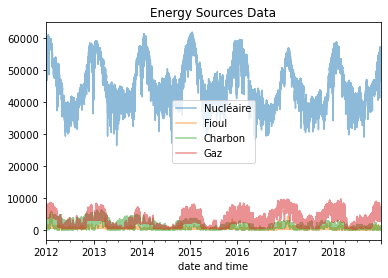

In [37]:
columns_to_plot = ['Nucléaire', 'Fioul', 'Charbon', 'Gaz']
test_df[columns_to_plot].dropna().plot(alpha=0.5)
plt.title("Energy Sources Data")
#plt.scatter(test_df.index, test_df[columns_to_plot], color="orangered", s=20)
plt.show()

Text(0.5, 1.0, 'Energy Sources Data')

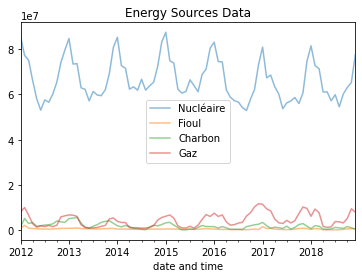

In [38]:
test_df[columns_to_plot].resample('1M').sum().dropna().plot(alpha=0.5)
plt.title("Energy Sources Data")

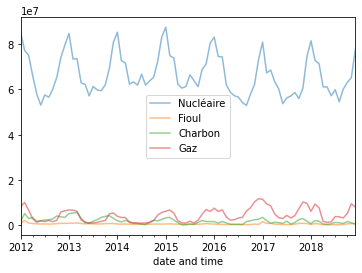

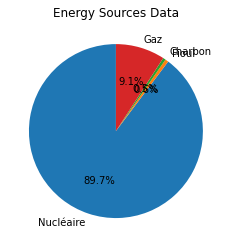

In [39]:
test_df[columns_to_plot].resample('1M').sum().dropna().plot(alpha=0.5)
plt.figure() # Create a new figure for the pie chart
sum_by_month = test_df[columns_to_plot].resample('1M').sum().dropna().iloc[-1] # Sum data for the last month
plt.pie(sum_by_month, labels=sum_by_month.index, autopct='%1.1f%%', startangle=90)  # Create the pie chart

plt.title("Energy Sources Data")
plt.show()

array([[<AxesSubplot:title={'center':'Nucléaire'}>,
        <AxesSubplot:title={'center':'Fioul'}>],
       [<AxesSubplot:title={'center':'Charbon'}>,
        <AxesSubplot:title={'center':'Gaz'}>]], dtype=object)

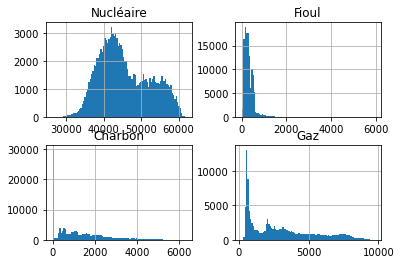

In [40]:
test_df[columns_to_plot].hist(bins=100)

<AxesSubplot:>

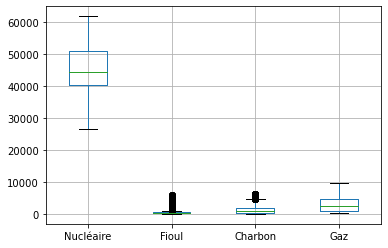

In [41]:
test_df[columns_to_plot].boxplot()

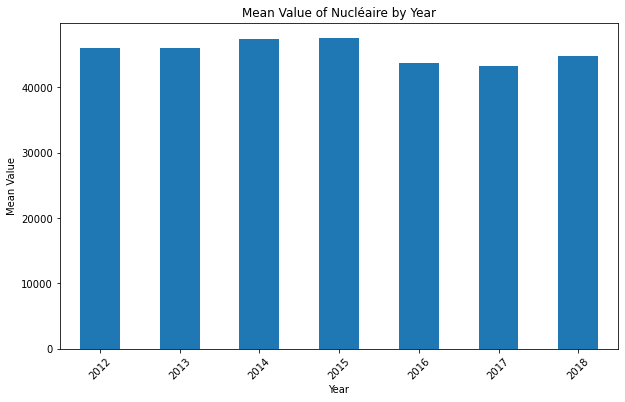

In [42]:
# Extracting the year from the index and grouping by year
grouped_by_year = test_df['Nucléaire'].groupby(test_df.index.year) 
# Calculating the mean value for each year
mean_by_year = grouped_by_year.mean()

# Plotting the mean value for each year
mean_by_year.plot(kind='bar', figsize=(10, 6))
# Customizing the plot
plt.title('Mean Value of Nucléaire by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

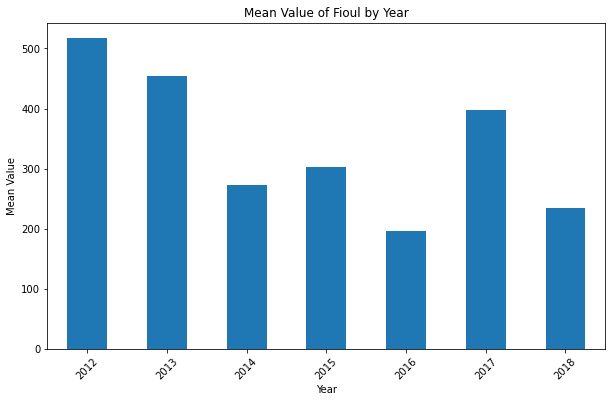

In [43]:
# Extracting the year from the index and grouping by year
grouped_by_year = test_df['Fioul'].groupby(test_df.index.year) 
# Calculating the mean value for each year
mean_by_year = grouped_by_year.mean()

# Plotting the mean value for each year
mean_by_year.plot(kind='bar', figsize=(10, 6))
# Customizing the plot
plt.title('Mean Value of Fioul by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

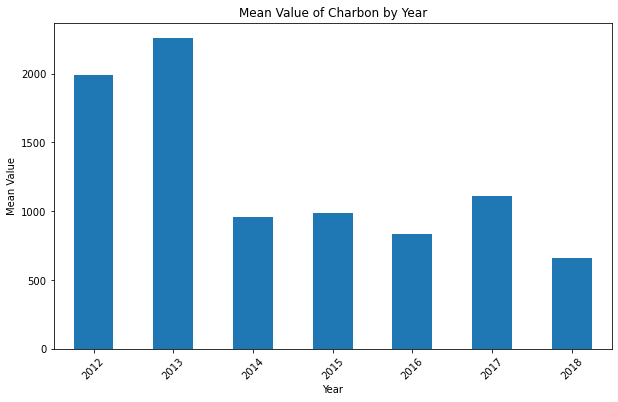

In [44]:
# Extracting the year from the index and grouping by year
grouped_by_year = test_df['Charbon'].groupby(test_df.index.year) 
# Calculating the mean value for each year
mean_by_year = grouped_by_year.mean()

# Plotting the mean value for each year
mean_by_year.plot(kind='bar', figsize=(10, 6))
# Customizing the plot
plt.title('Mean Value of Charbon by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

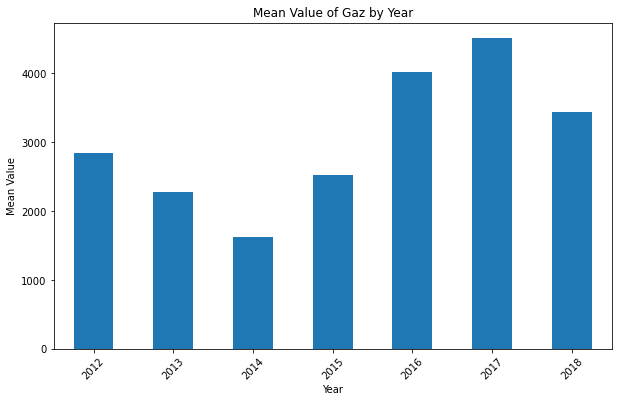

In [45]:
# Extracting the year from the index and grouping by year
grouped_by_year = test_df['Gaz'].groupby(test_df.index.year) 
# Calculating the mean value for each year
mean_by_year = grouped_by_year.mean()

# Plotting the mean value for each year
mean_by_year.plot(kind='bar', figsize=(10, 6))
# Customizing the plot
plt.title('Mean Value of Gaz by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

In [50]:
print(test_df[test_df['Nucléaire'].isnull()])

                     Consommation  Prévision J-1  Prévision J  Fioul  Charbon  \
date and time                                                                   
2012-01-01 00:15:00           NaN        57700.0      57550.0    NaN      NaN   
2012-01-01 00:45:00           NaN        56200.0      56000.0    NaN      NaN   
2012-01-01 01:15:00           NaN        55600.0      55250.0    NaN      NaN   
2012-01-01 01:45:00           NaN        56000.0      55200.0    NaN      NaN   
2012-01-01 02:15:00           NaN        55750.0      54300.0    NaN      NaN   
...                           ...            ...          ...    ...      ...   
2018-12-31 21:45:00           NaN        59050.0      59600.0    NaN      NaN   
2018-12-31 22:15:00           NaN        59700.0      60250.0    NaN      NaN   
2018-12-31 22:45:00           NaN        62050.0      62550.0    NaN      NaN   
2018-12-31 23:15:00           NaN        63750.0      64300.0    NaN      NaN   
2018-12-31 23:45:00         

In [47]:
# Define the window size for the rolling mean
window_size = 3  # You can adjust this according to your needs

# Filter out non-null values from the 'Nucléaire' column
non_null_values = test_df['Nucléaire'].dropna()

# Calculate the rolling mean for non-null values
rolling_mean = non_null_values.rolling(window=window_size).mean()

# Print or use the 'rolling_mean' Series, which contains the rolling mean for the 'Nucléaire' column, considering only non-null values
print(rolling_mean)

date and time
2012-01-01 00:00:00             NaN
2012-01-01 00:30:00             NaN
2012-01-01 01:00:00    52380.333333
2012-01-01 01:30:00    52131.333333
2012-01-01 02:00:00    51774.000000
                           ...     
2018-12-31 21:30:00    55627.666667
2018-12-31 22:00:00    55562.000000
2018-12-31 22:30:00    55423.000000
2018-12-31 23:00:00    55393.000000
2018-12-31 23:30:00    55393.000000
Name: Nucléaire, Length: 122736, dtype: float64


<AxesSubplot:title={'center':'Moyenne glissante sur un mois'}, xlabel='date and time'>

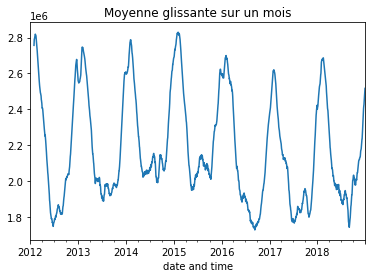

In [51]:
test_df['Nucléaire'].resample('1D').sum().dropna().rolling(30).mean().plot(title="Moyenne glissante sur un mois")

<AxesSubplot:title={'center':'Moyenne glissante sur un mois'}, xlabel='date and time'>

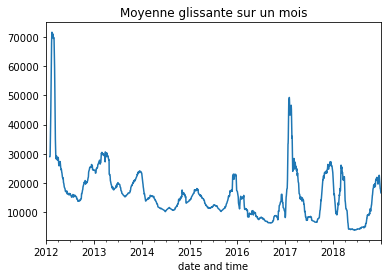

In [52]:
test_df['Fioul'].resample('1D').sum().dropna().rolling(30).mean().plot(title="Moyenne glissante sur un mois")

<AxesSubplot:title={'center':'Moyenne glissante sur un mois'}, xlabel='date and time'>

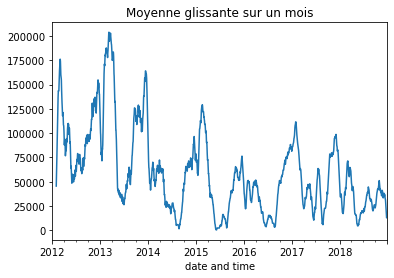

In [53]:
test_df['Charbon'].resample('1D').sum().dropna().rolling(30).mean().plot(title="Moyenne glissante sur un mois")

In [55]:
test_df

,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
date and time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:15:00,NaN,57700.0,57550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:30:00,58315.0,57200.0,56900.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:45:00,NaN,56200.0,56000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,NaN,62050.0,62550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:00:00,63977.0,63500.0,64000.0,146.0,11.0,3910.0,55589.0,1537.0,0.0,5148.0,...,4.0,2494.0,1296.0,116.0,3716.0,1432.0,0.0,557.0,318.0,296.0
2018-12-31 23:15:00,NaN,63750.0,64300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Moyenne glissante sur un mois'}, xlabel='date and time'>

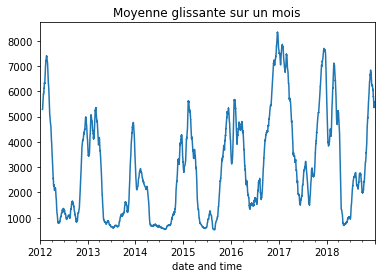

In [70]:
test_df['Gaz'].dropna().rolling(1000).mean().plot(title="Moyenne glissante sur un mois")

In [116]:
list_of_cols_for_correlation = ['Nucléaire', 'Fioul', 'Charbon', 'Gaz', 'Consommation']
list_of_cols_for_correlation

['Nucléaire', 'Fioul', 'Charbon', 'Gaz', 'Consommation']

In [118]:
# let's remove ND values from my test_df
test_df.replace("ND", np.nan, inplace=True)

<AxesSubplot:>

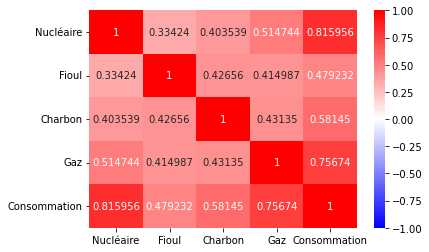

In [128]:
corr = test_df[list_of_cols_for_correlation].corr(method='pearson')   # on enregistre dans une variable le résultat de corr() des colonnes sources et conso du df
sns.heatmap(corr, annot=True, fmt='g', vmin=-1, vmax=1, cmap='bwr')

<AxesSubplot:>

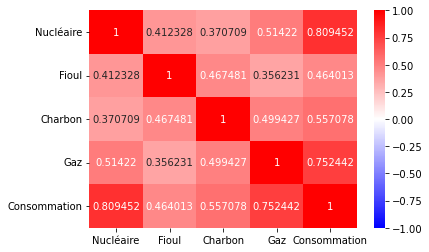

In [129]:
corr = test_df[list_of_cols_for_correlation].corr(method='spearman')   # on enregistre dans une variable le résultat de corr() des colonnes sources et conso du df
sns.heatmap(corr, annot=True, fmt='g', vmin=-1, vmax=1, cmap='bwr')

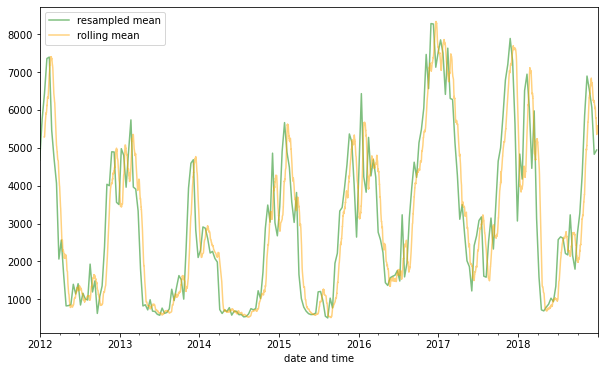

In [91]:


# Assuming your DataFrame is named 'test_df' and the 'Gaz' column is already set as the index

# Define the window size for the rolling mean
window_size = 1000  # You can adjust this according to your needs

# Calculate the rolling mean
rolling_mean = test_df['Gaz'].dropna().rolling(window=window_size).mean()

# # Plotting the original data and the rolling mean
plt.figure(figsize=(10, 6))
# test_df['Gaz'].dropna().plot(color="blue", alpha=0.5, label='Original Data')
test_df['Gaz'].dropna().resample('11D').mean().plot(color="green", alpha=0.5, label='resampled mean')
rolling_mean.plot(color='orange', alpha=0.5, label="rolling mean")
# plt.plot(test_df.index, rolling_mean, label=f'Rolling Mean (Window Size: {window_size})', linestyle='dashed')

# # Customizing the plot
# plt.title('Gaz Data and Rolling Mean')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend()
# plt.xticks(rotation=45)

# # Show the plot
# plt.tight_layout()
# plt.show()
plt.legend()

In [76]:
rolling_mean

date and time
2012-01-01 00:00:00            NaN
2012-01-01 00:30:00            NaN
2012-01-01 01:00:00    3822.000000
2012-01-01 01:30:00    3827.333333
2012-01-01 02:00:00    3835.000000
                          ...     
2018-12-31 21:30:00    4517.666667
2018-12-31 22:00:00    4015.000000
2018-12-31 22:30:00    3759.666667
2018-12-31 23:00:00    3788.000000
2018-12-31 23:30:00    3749.333333
Name: Gaz, Length: 122736, dtype: float64

In [ ]:
test_df.hist()


In [ ]:
test_df.boxplot()

In [ ]:


# Sample DataFrame with a time series index
# Assuming 'test_df' is your DataFrame with a DateTime index and columns like 'Nucléaire', 'Fioul', 'Charbon', 'Gaz'
# For example:
# test_df = pd.DataFrame(data, index=pd.to_datetime(date_index))

# Assuming columns_to_plot is a list of columns you want to visualize
columns_to_plot = ['Nucléaire', 'Fioul', 'Charbon', 'Gaz']

# Get the data for the specified columns
data_to_plot = test_df[columns_to_plot]

# Get the dates for the x-axis
dates = data_to_plot.index

# Get the number of columns to plot
num_columns = len(columns_to_plot)

# Set the width of each bar
bar_width = 0.2

# Calculate the starting position for each group of bars
bar_positions = np.arange(len(dates)) + 1

# Create the grouped bar chart
for i, column in enumerate(columns_to_plot):
    plt.bar(bar_positions + i * bar_width, data_to_plot[column], width=bar_width, label=column)

# Customize the plot if needed
plt.title("Energy Sources Data")
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(bar_positions + 0.5 * bar_width, dates, rotation=45)  # Set x-axis labels to be the dates and rotate them for better visibility
plt.legend()

plt.show()

In [ ]:
test_df[columns_to_plot].resample('1M').sum().dropna().plot(alpha=0.5)
plt.title("Energy Sources Data")

In [ ]:
# dataframes = []

# # Loop through each zip file in the folder
# for zip_file in os.listdir(folder_path):
#     if zip_file.endswith('.zip'):
#         zip_file_path = os.path.join(folder_path, zip_file)

#         # Extract the zip file
#         with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#             # Extract each file from the zip
#             for file_name in zip_ref.namelist():
#                 with zip_ref.open(file_name) as file:
#                     # Read the content of the file using different encodings
#                     for encoding in ['utf-8', 'latin-1', 'utf-16']:
#                         try:
#                             decoded_content = file.read().decode(encoding)
#                             # Remove accents
#                             cleaned_content = unidecode(decoded_content)

#                             # Check if the cleaned content is empty or contains only whitespace
#                             if not cleaned_content.strip():
#                                 continue  # Skip empty files

#                             # Convert the cleaned content to a pandas DataFrame
#                             # Assuming the data inside the file is in CSV format
#                             df = pd.read_csv(io.StringIO(cleaned_content))
                            
#                             # Check if the dataframe has any columns
#                             if not df.empty:
#                                 # Append the dataframe to the list
#                                 dataframes.append(df)
#                             else:
#                                 print(f"Empty dataframe in file: {file_name}")
                            
#                             break  # Break the loop if successful decoding
#                         except UnicodeDecodeError:
#                             continue  # Try the next encoding if decoding fails

# # Concatenate all dataframes into one dataframe
# final_dataframe = pd.concat(dataframes, ignore_index=True)

**Objectifs**
    
1. Charger et nettoyer des données : read_csv, parse date, concat
2. Manipuler les données pour mieux les comprendre : groupby, pivot, stack/unstack

## Création des dataframes
**TODO**
        
1. Créer deux dataframes:
    - le 1er en concaténant les données nationales annuelles 
    - le 2nd en concaténant les données régionales annuelles
    - il faudra construire un index de datetime à partir des colonnes 'Date' et 'Heures'

**Aide**
- bien lire la note sur les données RTE afin de comprendre sur quelles données on travaille ...
- la méthode read_csv (pandas) peut lire les fichiers zip ;-) (encoding: latin-1, séparateur de colonnes: \t)
- un tips pour détecter l'encoding: https://superuser.com/questions/301552/how-to-auto-detect-text-file-encoding
- la méthode listdir (os) peut vous aider à lister tous les fichiers d'un dossier, startswith à sélectionner ceux qui vous intéressent
- pensez à "droper" les colonnes qui ne contiennent pas d'information
- pour le dataframe des données régionales, vous pouvez utiliser un multiindex
- certaines colonnes sont vides ? https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

**Notes sur les données RTE** 
- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata)
- Leur format n'est pas optimal : un peu de manipulation est nécessaire afin de pouvoir les exploiter. Pas de panique, il faut juste procéder par étape !
    1. Chargez un des fichiers directement avec read_csv (n'importe lequel, ils sont tous construits de la même façon)
    2. Affichez le dataframe obtenu, et essayez de comprendre ce qui cloche ...
    3. Les quelques lignes de code suivante permettent d'afficher la 1ere et la 10ème ligne contenues dans un fichier. Est-ce que le problème apparait plus clairement ? (pensez à modifier le chemin d'accès...)
    4. Ecrivez une fonction qui permet de charger correctement un des fichiers
    5. Vous pouvez maintenant utiliser cette fonction pour créer votre dataframe en concaténant les fichiers

**Plus d'informations sur les données :** <br/> 
- https://www.rte-france.com/eco2mix <br/>
- https://www.rte-france.com/eco2mix/telecharger-les-indicateurs

Les données que nous allons traiter sont sous un format nouveau, il peut s'avérer difficile de les importer pour vous : fixez vous un objectif à ne pas passer plus de 2h à les importer. Si vous dépassez ce temps, je vous conseille de vous référer aux codes cachés que je vous transmets ci-dessous et de vous replonger dedans plus tard afin que vous ayez le temps d'explorer les données.

<details><summary>Code import données nationales</summary><br>
def create_datetime_index(df):<br/>
    df['DateTime'] = pd.to_datetime(df['Date'].map(str) + ' ' + df['Heures'].map(str))<br/>
    df.drop(['Date', 'Heures'], axis=1, inplace=True)<br/>
    df.set_index('DateTime', inplace=True)<br/>
    return <br/>

def read_rte_file(file_name):<br/>
    df = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, header=None, skiprows=1, na_values='ND')<br/>
    df.drop(df.columns[-1], axis=1, inplace=True)<br/>
    df_titles = pd.read_csv(file_name, encoding='ISO-8859-1', sep='\t', index_col=None, nrows=0)<br/>
    df.columns = df_titles.columns<br/>
    return df<br/>

DATA_FILE = 'data/data_rte/'<br/>

files = [f for f in listdir(DATA_FILE) if f.startswith('eCO2mix_RTE_Annuel-Definitif')]<br/>

df_all = []<br/>

for f in files:<br/>
    df = read_rte_file(DATA_FILE+f)<br/>
    df_all.append(df)<br/>
df_all = pd.concat(df_all)<br/>
df_all = df_all[(\~df_all['Date'].isna())&(~df_all['Heures'].isna())]<br/>
create_datetime_index(df_all)<br/>
df_all.describe()<br/>
</details>

**Note : In a loop it is not a good idea to concat the dataframe at each step, because it will sort each dataframe and this will takes a lot of time. A better solution is to create a list of dataframes and concat at the end of the loop (as is done here).**

<details><summary>Code import données régionales</summary><br>
files = [f for f in listdir(DATA_FILE) if not f.startswith('eCO2mix_RTE_Annuel-Definitif')]<br/>

list_reg = set([f[len('eCO2mix_RTE_'):-len('_Annuel-Definitif_2013.zip')] for f in files])<br/>

df_all_reg = {}<br/>

for reg in list_reg:<br/>
    df_reg = []<br/>
    for f in files :<br/>
        if reg in f :<br/>
            df = read_rte_file(DATA_FILE+f)<br/>
            df.drop(len(df)-1, inplace=True)<br/>
            create_datetime_index(df)<br/>
            df_reg.append(df)<br/>
    df_reg = pd.concat(df_reg)<br/>
    df_reg.drop(['Périmètre', 'Nature'], axis=1, inplace=True)<br/>
    df_reg.dropna(how='all', inplace=True)<br/>
    df_all_reg[reg] =df_reg<br/>
df_all_reg = pd.concat(df_all_reg, axis=1)<br/>
</details>

## Exploration du dataset

### Réflexion

A présent vous savez ce que vous avez dans vos données (cf. https://www.rte-france.com/eco2mix)<br/>

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et les premières statistiques descriptives que vous avez trouvées : quelles questions vous posez-vous sur les données ? Qu'avez-vous envie d'explorer ? (essayez de ne pas vous laisser biaiser par les titres du Notebook)

### Mise en application

**TODO**
    
L'objectif ici est de **comprendre les données** présentes dans les deux dataframes que vous avez créés. Réfléchissez aux descripteurs statistiques les plus appropiés pour chaque question.  
<br/>

1. Dataset national
    - Tracer la consommation nationale en fonction du temps
    - Tracer la production des différentes sources. Quelle est la source de production largement majoritaire ?
    - Afficher sur un même graphique : la production nucléaire, la consommation et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?
    - Quelles sources ont un fonctionnement
        - de "base" (production régulière) ?
        - de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

 <br/>
2. Dataset régional
    - Tracer sur un même graphique la consommation des différentes régions en fonction du temps
    - Peut-on observer des différences comportementales significatives entre les régions ? (par ex entre une région du nord et une région du sud)
    - Quelles régions sont les plus consommatrices ? Y a-t-il un moment dans l'année où la région IdF n'est pas la plus consommatrice ?
    - Afficher la production nucléaire par région en ftc du temps. Dans quelles régions sont situées les centrales nucléaires ?
    - Quelles régions produisent le plus de solaire / éolien ?
    - Observer les informations concernant la région AuRA. Retrouver la signification du signe des échanges ? Pourquoi la région est-elle autant exportatrice ?

**Aide**
- la méthode **.plot()** fonctionne parfaitement avec un datetime en index
- si vous utilisez un multiindex, la méthode **swaplevel** peut vous aider
- attention aux **nan** pour les plots..

### Dataset national

#### consommation nationale en fonction du temps

#### production des différentes sources

#### production nucléaire, consommation et échanges aux frontières

#### fonctionnement de base ou ponctuel ?

### Dataset régional


Attention à bien nuancer nos propos dans cette partie là : chaque région n'est pas égale en population, en superficie,...
- https://www.ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/regions-departements/
- https://www.regions-departements-france.fr/regions-francaises.html

#### Manipulation de notre dataframe avec les index : récupération de la consommation par région

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

#### consommation en fonction du temps

#### différences comportementales entre les régions

#### les plus consommatrices

#### production nucléaire

#### production solaire / éolien


## Comparaison des situations régionales

**TODO**

1. Autonomie électrique des régions : 
    - Afficher la 'consommation - sum(productions)' pour chaque région
    - Quelles régions sont autonomes ? En excès ? En déficit ?
    - Comparer ce résultat à la colonne 'Ech. physiques'
    - Bonus: reconstruire les flux inter-régionaux ...

    
2. Etude de la production solaire :
    - Quelle région produit le plus (en moyenne et au max) ? 
    - Quelle évolution sur les dernières années ?
    - Quelle région a le meilleur taux 'énergie produite / puissance installée' ? (la puissance installée peut être assimilée au maximum produit, attention cette capacité peut augmenter dans le temps...)

    
3. Mêmes questions pour l'éolien
    

**Aide**


- Les méthodes groupby, unstack, ou pivot sont très utiles pour manipuler des dataframes


### Autonomie électrique des régions

#### Afficher la 'consommation - sum(productions)' pour chaque région

#### Quelles régions sont autonomes ? en exces ? en déficit ?

#### Comparer ce résultat à la colonne 'Ech. physiques'

#### Bonus : reconstruire les flux inter-régionaux ...

### Etude de la production solaire

### Mêmes questions pour l'éolien

## Etude des consommations 

**TODO**


1. Afficher les moyennes des consommations régionales pour chaque année, avec et sans standardisation. Quelles informations visualisez vous ?
    
2. Faire pareil avec la moyenne de consommation selon le jour de la semaine.

3. Tracer les consommations horaires (par heure) moyenne par région en décembre et en juin. Peut-on observer les différences d'ensoleillement entre les régions ?

4. Tracer ces mêmes courbes, en ne sélectionnant que les jours de semaine, puis que les jours de week end. Quelles différences de comportement peut-on observer ?


**Aide**

- un DatetimeIndex possède de nombreux attributs et méthodes utiles: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html
- Regarder la doc des méthodes groupby, unstack, pivot...
- Si besoin, utiliser la méthode seaborn.heatmap pour visualiser vos résultats (cmap="YlGnBu")



#### moyennes des consommations régionales pour chaque année, avec et sans standardisation

#### moyenne de consommation selon le jour de la semaine

#### consommations décembre vs juin

#### consommation semaine vs week end

# Relation entre les features / variables

## Liens productions / consommation

**TODO**
        
- Afficher les correlations entre toutes les productions et la consommation
- Quelles éléments sont corrélés parce que liés ? Quels éléments sont corrélés mais n'ont à priori pas de lien de cause à effet ?
- Quel indice montre que la consommation 'cause' la production avec du gaz ?
- Quels types de productions permettent de "suivre" la consommation ? Lesquels ne le permettent pas du tout (productions "fatales")
- Choisissez une ou deux régions et observez ces mêmes corrélations.

BONUS : Visualisation de la PCA :
- La consommation nationale et la production nucléaire sont fortement correlées. Tracer un scatterplot de l'une en fct de l'autre.
- Effectuer une PCA pour passer de deux dimensions à une seule, puis visualiser sur le plot précédent la composante obtenue.

Le nucléaire produit beaucoup, mais est peu pilotable. <br/>
En revanche le gaz est allumé lorsqu'il y a beaucoup de demande : la demande cause la production de gaz.

### Au niveau national

#### Afficher les correlations entre toutes les productions et la consommation

#### Quels éléments sont corrélés parce que liés ? Quels éléments sont corrélés mais n'ont à priori pas de lien de cause à effet ?

Les corrélations peuvent être dues à une relation de causalité, par exemple, une hausse rapide de la consommation va entrainer une hausse de la production avec du gaz. Ainsi on peut noter que la production de gaz suit une hausse de la consommation. Ce genre d'intuition est à l'origine de la notion de [causalité de Granger](https://en.wikipedia.org/wiki/Granger_causality)

#### Quel indice montre que la consommation 'cause' la production avec du gaz?

Ci dessous on vérifie que la production de gaz suit en moyenne la hausse de la consommation :<br/>
An idea from: https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas

#### Quels types de productions permettent de "suivre" la consommation ? Lesquels ne le permettent pas du tout (productions "fatales")

### Au niveau régional

## Prix de l'électricité

On s'intéresse maintenant aux données dans le dossier "data entsoe".<br/>
https://doc.opendatadsl.com/docs/company/ENTSOE#entsoe_el_tl_actcf

**TODO**

- Charger les prix de marché de l'électricité  (en France et en Allemagne)  <br/>
- Chercher les liens (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) entre : 
    - Le prix de l'électricité et la consommation nationale ?
    - Le prix de l'électricité et les sources de production ? 
    - Quelles sources semblent associées aux prix élevés ? aux prix faibles ?
            
**Aide:**

- Attention aux timezone ! Les prix sont en UTC. Les méthodes **tz_localize('UTC') et tz_convert('Europe/Paris')** pourraient vous aider ...
- On ne peut pas comparer timeserie "localisée" avec une autre qui ne l'est pas ("naive")
- Pour associer le dataframe de conso/prod à une timezone : les changements d'heures ont mal été gérés (cherchez à comprendre le problème). Utliser **"ambiguous = 'NaT', nonexistent='NaT'"** pour le contourner.
- Y a-t-il des **outliers** ?

#### Charger les prix de marché de l'électricité (en France et en Allemagne)

<details><summary>Code import données électricité</summary><br>
def read_data_entsoe(file):<br/>
    df = pd.read_csv(file)<br/>
    df['start'], _ = df['MTU (UTC)'].str.split(' - ', 1).str<br/>
    df.set_index('start', inplace=True)<br/>
    df.index = pd.to_datetime(df.index, yearfirst=True)<br/>
    df.drop(columns=['MTU (UTC)'], inplace=True)<br/>
    return df<br/>
    
DATA_FILE = './data/data entsoe/France/'<br/>

def get_prices(folder, col='fr'):<br/>
    df_prices = []<br/>
    for f in listdir(folder):<br/>
        df = read_data_entsoe(folder + f)<br/>
        df.columns = [col]<br/>
        df_prices.append(df)<br/>
    df_prices= pd.concat(df_prices, axis=0)<br/>
    return df_prices<br/>

df_prices = pd.concat((get_prices('./data/data entsoe/Electricity_price/France/', 'fr'),<br/>
                         get_prices('./data/data entsoe/Electricity_price/Germany/', 'ger')), 1)<br/>
</details>

#### Recherche de liens

## Emissions de CO2

**TODO**

- Quel lien entre le taux de C02 et les différentes sources de productions ?
- Quelles sources semblent les plus émettrices ?

## Caractéristation des échanges avec les frontières
**TODO**

- A quel moment les échanges ont-il principalement lieu ?
- Quel est le prix payé par la France lorsqu'elle importe de l'électricité ? 
- Quel est le prix reçu lors des exportations ?


` >0 = importation, <0 = exportation`

#### A quel moment les échanges ont-il principalement lieu ?

#### Quel est le prix payé par la France lorsqu'elle importe / exporte de l'électricité ?